# Loading packages

In [2]:
import numpy as np
import pandas as pd
import glob

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
from pandas.api.types import CategoricalDtype

# Plotting raw response proportions

### Loading the necessary data

### Unpooled effects by country

In [5]:
long_data = pd.read_csv("../output/proportions_by_country.csv")

In [6]:
long_data.head()

,Country,Item,Proportion,Succesful Replication,Sample Size
0,Australia,1,0.446809,No,282
1,Austria,1,0.198198,Yes,111
2,Belgium,1,0.192708,Yes,192
3,Bulgaria,1,0.181102,Yes,127
4,Chile,1,0.186207,Yes,145


### Coding missing data as a string for the figure (If coded as np.nan Seaborn will ignore values)

In [7]:
long_data.loc[long_data["Succesful Replication"].isna(),"Succesful Replication"] = "NA"

### Hack to make the scatterplot align with the pointplots

In [8]:
long_data["Item2"] = long_data["Item"] - 1

### Meta-analytic effects

In [9]:
prop_df = pd.read_excel("../output/Meta analysis proportions.xlsx", index=False)

In [10]:
prop_df.loc[7, "Succesful Replication"] = "NA"

In [11]:
prop_df.head()

,prop,lb,ub,p-value,Item,Succesful Replication
0,0.241358,0.211271,0.274240,6.539007e-39,1,Yes
1,0.614820,0.586543,0.642342,7.730740e-15,2,Yes
2,0.123918,0.106135,0.144201,2.377183e-106,3,Yes
3,0.509695,0.478994,0.540324,5.360876e-01,4,No
4,0.102886,0.082922,0.126991,2.691424e-71,5,Yes


### Original effects

In [12]:
original_pt_proportions_df = pd.read_csv("../output/original_proportions.csv")

In [13]:
original_pt_proportions_df.head()

,Item,Proportion,Country
0,1,0.18,Original
1,2,0.83,Original
2,3,0.20,Original
3,4,0.65,Original
4,5,0.14,Original


### Plotting the figure

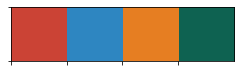

In [14]:
sns.palplot(['#cb4335', '#2e86c1', "#e67e22", "#0E6251"])

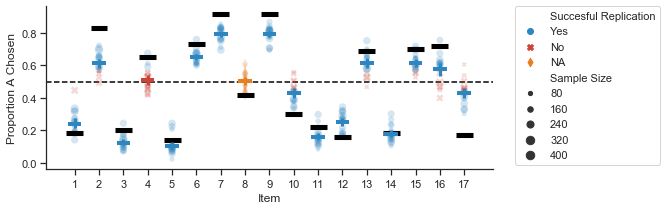

In [15]:
sns.set(font_scale=1, style="ticks")
fig, ax = plt.subplots(figsize=(8, 3))

# Country-level data
sns.scatterplot(x="Item2", y="Proportion", data=long_data, hue="Succesful Replication", hue_order=["Yes", "No", "NA"],
                    style="Succesful Replication", size="Sample Size", linewidth=0, alpha=0.2, palette=['#2e86c1', '#cb4335', "#e67e22"],
               markers={"Yes": "o", "No": "X", "NA":"d"}, ax=ax, zorder=-1000)

# Original Proportions
sns.pointplot(data=original_pt_proportions_df, x="Item", y="Proportion", join=False, markers="_", order=np.arange(1, 18),
             color='black', scale=2.5, zorder=-1000)

# Meta-analysis
sns.pointplot(data=prop_df, x="Item", y="prop", join=False, markers="_",
              scale=2, ax = ax, palette=['#2e86c1', '#cb4335', "#e67e22"], hue="Succesful Replication",
                  label=None,
                 order=prop_df["Item"].values, zorder=3000)

# Meta-analysis error bars
plt.errorbar(
    np.arange(17),
    prop_df["prop"],
    yerr=[prop_df["prop"] - prop_df["lb"], prop_df["ub"] - prop_df["prop"]],
    linestyle='',
    linewidth=3, color=['#2e86c1', '#2e86c1', '#2e86c1', '#cb4335', '#2e86c1', '#2e86c1', '#2e86c1', "#e67e22",
                       '#2e86c1', '#2e86c1', '#2e86c1', '#2e86c1', '#2e86c1', '#2e86c1', '#2e86c1', '#2e86c1',
                       '#2e86c1'])
# Indifference line
ax.axhline(ls='--', c="black", y=0.5, zorder=-3000)

# Aesthetic edits
lgd = plt.legend(handles=ax.get_legend_handles_labels()[0][:-3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set(ylabel="Proportion A Chosen")
sns.despine()

# Saving figure
plt.savefig("../figures/Figure 1a.svg", bbox_extra_artists=(lgd,),
           bbox_inches="tight")

# Plotting attenuation effects

### Loading the deviations in effect size from the original study by country

In [16]:
country_deviations_signed_long = pd.read_csv("../output/deviations_from_original_by_country.csv")

### Relabelling the "Succesful replication" variable for the figure

In [17]:
country_deviations_signed_long.loc[country_deviations_signed_long["Succesful Replication"] == 1,
                                   "Successful Replication"] = "Yes"
country_deviations_signed_long.loc[country_deviations_signed_long["Succesful Replication"] == 0,
                                   "Successful Replication"] = "No"

In [18]:
country_deviations_signed_long["Successful Replication"].value_counts()

Yes    247
No      57
Name: Successful Replication, dtype: int64

In [19]:
country_deviations_signed_long = country_deviations_signed_long.loc[country_deviations_signed_long["Item"]!=8, :]

In [20]:
country_deviations_signed_long["Item2"] =country_deviations_signed_long["Item"]
country_deviations_signed_long.loc[country_deviations_signed_long["Item2"] > 8, "Item2"] = country_deviations_signed_long.loc[country_deviations_signed_long["Item2"] > 8, "Item2"] - 1
country_deviations_signed_long["Item2"] = country_deviations_signed_long["Item2"] - 1

In [21]:
country_deviations_signed_long["Item2"].value_counts()

15    19
14    19
13    19
12    19
11    19
10    19
9     19
8     19
7     19
6     19
5     19
4     19
3     19
2     19
1     19
0     19
Name: Item2, dtype: int64

### Computing deviations from the original study for the meta-analytic coefficients

In [22]:
original_pt_proportions = original_pt_proportions_df["Proportion"].values

In [23]:
original_pt_distance_from_indifference = original_pt_proportions - 0.5

In [24]:
original_pt_distance_from_indifference

array([-0.32,  0.33, -0.3 ,  0.15, -0.36,  0.23,  0.42, -0.08,  0.42,
       -0.2 , -0.28, -0.34,  0.19, -0.32,  0.2 ,  0.22, -0.33])

In [25]:
prop_df_dev = prop_df.copy()
prop_df_dev = prop_df_dev.set_index(pd.Index([str(x) for x in np.arange(1, 18)]))
prop_df_dev["prop"] = prop_df_dev["prop"] - original_pt_proportions
prop_df_dev["lb"] = prop_df_dev["lb"] - original_pt_proportions
prop_df_dev["ub"] = prop_df_dev["ub"] - original_pt_proportions
prop_df_dev = prop_df_dev.reset_index(drop=True)

In [26]:
for ix in prop_df_dev.index:
    if original_pt_distance_from_indifference[ix] < 0:
        prop_df_dev.loc[ix, "prop"] = prop_df_dev.loc[ix, "prop"]*-1
        prop_df_dev.loc[ix, "ub"] = prop_df_dev.loc[ix, "ub"]*-1
        prop_df_dev.loc[ix, "lb"] = prop_df_dev.loc[ix, "lb"]*-1

In [27]:
prop_df_dev = prop_df_dev.loc[prop_df_dev["Item"]!=8, :]

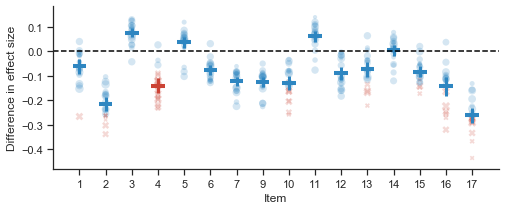

In [30]:
sns.set(font_scale=1, style="ticks")
fig, ax = plt.subplots(figsize=(8, 3)) 

# Plotting the unpooled country effects
sns.scatterplot(x="Item2", y="Deviation", data=country_deviations_signed_long,
                zorder=-1000, size="Sample Size",
                    hue="Successful Replication", linewidth=0, alpha=0.2,
                     palette=['#2e86c1', '#cb4335'],
                    style="Successful Replication", markers={"Yes": "o", "No": "X"}, ax=ax,
               hue_order=("Yes", "No"))

# Plotting the meta-analytic effects
sns.pointplot(data=prop_df_dev, x="Item", y="prop", join=False, markers="_",
              scale=2, ax = ax, palette=['#2e86c1', '#cb4335', "#e67e22"], hue="Succesful Replication",
                  label=None, zorder=3000)


# Plotting the meta-analytic error bars
plt.errorbar(
    np.arange(16),
    prop_df_dev["prop"],
    yerr=[prop_df_dev["prop"] - prop_df_dev["lb"], prop_df_dev["ub"] - prop_df_dev["prop"]],
    linestyle='',
    linewidth=3, color=['#2e86c1', '#2e86c1', '#2e86c1', '#cb4335', '#2e86c1', '#2e86c1', '#2e86c1',
                       '#2e86c1', '#2e86c1', '#2e86c1', '#2e86c1', '#2e86c1', '#2e86c1', '#2e86c1', '#2e86c1',
                       '#2e86c1'])

# Line signifying the original effect sizes 
ax.axhline(ls='--', c="black")

# Aesthetic edits
ax.set(ylabel="Difference in effect size", xlabel="Item")
ax.get_legend().remove()
sns.despine()

# Saving figure
plt.savefig("../figures/Figure 1b.svg",
           bbox_inches="tight")

# Plot replication rates by country

In [31]:
replication_rate_by_country = pd.read_csv("../output/replication_rate_by_country.csv")
replication_rate_by_country.tail()

,Country,Succesful Replication,Continent,Colour
15,Australia,0.7500,Oceania,"(0.33999999999999997, 0.86, 0.6683428571428571)"
16,Austria,0.7500,Europe,"(0.86, 0.3712, 0.33999999999999997)"
17,Bulgaria,0.7500,Europe,"(0.86, 0.3712, 0.33999999999999997)"
18,Ireland,0.7500,Europe,"(0.86, 0.3712, 0.33999999999999997)"
19,Chile,0.6875,South America,"(0.33999999999999997, 0.6059428571428571, 0.86)"


In [32]:
import matplotlib.colors as colors

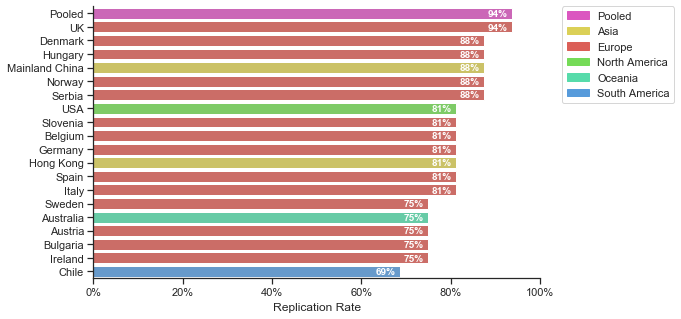

In [33]:
import matplotlib.patches as mpatches

bar_colours = replication_rate_by_country["Colour"].str.lstrip('(').str.rstrip(')').str.split(", ").values
for i in range(len(bar_colours)):
    for j in range(len(bar_colours[1])):
        bar_colours[i][j] = float(bar_colours[i][j])
cont_col_dict = dict(zip(replication_rate_by_country["Continent"][1:].unique(), sns.color_palette("hls", 7)[:5]))

sns.set(font_scale=1, style="ticks")
fig, ax= plt.subplots(figsize=(8, 5))
sns.barplot(y="Country", x="Succesful Replication", data=replication_rate_by_country, ax=ax, palette=bar_colours)
ax.set(xlim=(0, 1), xlabel="Replication Rate",
      xticklabels=[str(x) + "%" for x in np.arange(0, 120, 20)], ylabel="")
sns.despine()

pooled = mpatches.Patch(color=sns.color_palette("hls", 7)[6], label='Pooled')
asia = mpatches.Patch(color=cont_col_dict["Asia"], label='Asia')
europe = mpatches.Patch(color=cont_col_dict["Europe"], label='Europe')
north_america = mpatches.Patch(color=cont_col_dict["North America"], label='North America')
oceania = mpatches.Patch(color=cont_col_dict["Oceania"], label='Oceania')
south_america = mpatches.Patch(color=cont_col_dict["South America"], label='South America')

for i in ax.patches:
    #get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()-.01, i.get_y()+.1, \
            str(int(np.round(i.get_width()*100)))+'%', fontsize=10,
    color='white', verticalalignment='top', horizontalalignment="right",
           weight="heavy")
lgd = plt.legend(handles=[pooled, asia, europe, north_america, oceania, south_america], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig("../figures/Figure 2.svg", bbox_inches="tight", bbox_extra_artists=(lgd,))

# Gender Figure

### Load and prepare data

In [34]:
data= pd.read_pickle("../data/modified_exclusions/pt_replication_modified_exclusions_data.pkl")

In [35]:
data.head()

,1,2,3,4,5,6,7,8,9,10,...,Loss_Intuition,Country,Duration_in_seconds,Language,Sample,Duration_Minutes,YoB,Awareness_of_Loss_Aversion,Financial_Stress,Presentation_Order
0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,Bulgaria,356,Bulgarian,Direct,5.933333,1992,3,NaN,4|6|2|3|17|18|14|8|7|15|1|12|11|5|13|16|9|10
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,NaN,Bulgaria,931,Bulgarian,Direct,15.516667,1979,1,NaN,7|17|16|11|15|18|4|9|1|13|2|10|6|14|5|12|8|3
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,Bulgaria,462,Bulgarian,Direct,7.700000,1975,3,NaN,11|8|4|7|12|18|3|14|6|16|17|1|2|13|5|15|9|10
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,NaN,Bulgaria,412,Bulgarian,Direct,6.866667,1977,1,NaN,16|7|6|9|12|18|10|8|5|15|2|3|4|14|11|1|17|13
4,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,NaN,Bulgaria,490,Bulgarian,Direct,8.166667,1970,1,NaN,13|4|3|7|9|18|16|8|14|1|6|12|17|10|5|2|11|15


In [36]:
long_data_gender = data.melt(value_vars=[str(x) for x in np.arange(1, 18)], id_vars=["Country", "Gender"], var_name="Item", value_name="Proportion A")

In [37]:
long_data_gender.loc[long_data_gender["Gender"]=="Other", "Gender"] = np.nan

### Plot figure

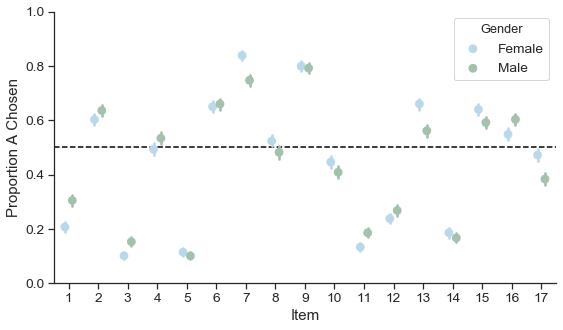

In [38]:
sns.set(font_scale=1.25, style="ticks")
fig, ax = plt.subplots(figsize=(9, 5))
sns.pointplot(data=long_data_gender, x="Item", y="Proportion A", join=False, ax=ax,
              order=[str(x) for x in np.arange(1, 18)],
              hue="Gender", unit="Country", inner=None, dodge=.25,
             hue_order=["Female", "Male"], zorder=2000,
             palette=['#B9D9EB', '#a3c1ad'])
ax.axhline(ls='--', c="black", y=0.5, zorder=-1000)
ax.set(ylim=(0,1), ylabel="Proportion A Chosen")
sns.despine()
plt.savefig("../figures/Extended Data Figure 1.svg")

# Contrast Figure

### Loading the data

In [39]:
pt_contrasts_df2 = pd.read_excel("../output/contrasts_by_country.xlsx")

In [40]:
pt_contrasts_df2.head()

,Country,Effect,Item 1,Item 2,A1,B1,A2,B2,OR,p-value,OR2,Significance,Contrast,Sample Size,Significant,LogOR,Significance2,LogOR_difference,Replicates
0,Bulgaria,Certainty Effect,1,2,23,104,72,55,0.168937,2.425416e-10,5.919368,True,1 vs 2,127,Yes,-1.778230,1,-1.343796,Yes
1,Bulgaria,Certainty Effect,3,4,15,112,65,62,0.127747,1.080756e-11,7.827957,True,3 vs 4,127,Yes,-2.057702,1,0.040780,Yes
2,Bulgaria,Certainty Effect,7,8,109,18,76,51,4.063596,4.697618e-06,4.063596,True,7 vs 8,127,Yes,1.402068,1,-1.302852,Yes
3,Bulgaria,Reflection Effect,3,7,15,112,109,18,0.022117,5.761813e-35,45.214815,True,3 vs 7,127,Yes,-3.811425,1,0.038664,Yes
4,Bulgaria,Reflection Effect,4,8,65,62,76,51,0.703523,2.066420e-01,1.421418,False,4 vs 8,127,No,-0.351655,0,-1.300735,No


In [41]:
PT_contrasts_original_df = pd.read_excel("../output/original_contrasts.xlsx")
PT_contrasts_original_df.head()

,Effect,Item 1,Item 2,A1,B1,A2,B2,OR,p-value,OR2,Significance,LogOR
0,Certainty Effect,1,2,13,59,60,12,0.044068,1.558248e-15,22.692308,True,-3.122026
1,Certainty Effect,3,4,19,76,62,33,0.133065,3.373660e-10,7.515152,True,-2.016921
2,Certainty Effect,7,8,87,8,40,55,14.953125,1.598340e-13,14.953125,True,2.704920
3,Reflection Effect,3,7,19,76,87,8,0.022989,4.395039e-25,43.500000,True,-3.772761
4,Reflection Effect,4,8,62,33,40,55,2.583333,2.163003e-03,2.583333,True,0.949081


In [42]:
lor_df = pd.read_excel("../output/Meta analysis log odds.xlsx")

In [43]:
lor_df.head()

,lodds,lb,ub,p-value,Contrasts,Succesful Replication,Item 1,Item 2,LogOR_difference,ub_difference,lb_difference,Effect
0,-1.581017,-1.720487,-1.441547,2.305722e-109,1 vs 2,Yes,1,2,-1.541009,-1.680479,-1.401539,Certainty Effect
1,-1.969901,-2.081812,-1.857990,7.994243e-261,3 vs 4,Yes,3,4,-0.047020,-0.158931,0.064891,Certainty Effect
2,1.332841,1.235518,1.430164,1.052629e-158,7 vs 8,Yes,7,8,-1.372080,-1.274757,-1.469403,Certainty Effect
3,-3.332428,-3.565245,-3.099612,3.568163e-173,3 vs 7,Yes,3,7,-0.440333,-0.673149,-0.207516,Reflection Effect
4,0.026007,-0.143975,0.195989,7.642756e-01,4 vs 8,No,4,8,-0.923074,-0.753092,-1.093056,Reflection Effect


### Changing effect labels to match reviewer feedback

In [44]:
pt_contrasts_df2["Effect"] = pt_contrasts_df2["Effect"].replace({"Range Adaptation":"Magnitude perception", "Certainty Effect":"Certainty effect",
                                   "Reflection Effect":"Reflection effect", "Isolation Effect":"Isolation effect",
                                   "Framing Effect":"Framing effect"})

### Preparing colours

In [47]:
effect_type = sns.color_palette(['#E69F00', '#56B4E9', "#009E73", "#F0E442", "#0072B2", "#CC79A7"])

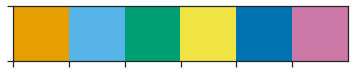

In [48]:
sns.palplot(effect_type)

### Drawing the figure

Wall time: 482 ms


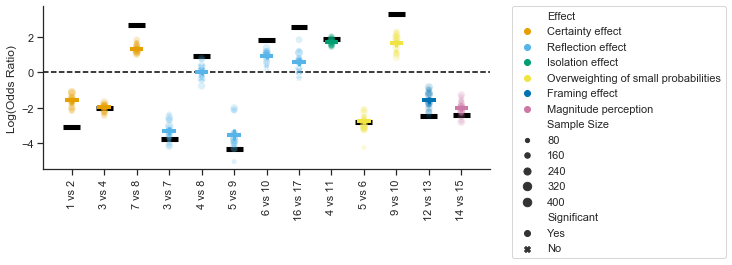

In [49]:
%%time
sns.set(font_scale=1, style="ticks")
fig, ax = plt.subplots(figsize=(8, 3))
sns.scatterplot(data=pt_contrasts_df2, x="Contrast", y="LogOR", hue="Effect", ax = ax,
               alpha = 0.2, style="Significant", markers={"Yes": "o", "No": "X"},
               style_order=["Yes", "No"], size="Sample Size", linewidth=0,
               palette=effect_type,  zorder=1000)

g = sns.pointplot(data=PT_contrasts_original_df, x=np.arange(13), y="LogOR", join=False, markers="_",
              scale=2.5, ax = ax, color="black", label=None, zorder=1)
e = sns.pointplot(data=lor_df, x="Contrasts", y="lodds", join=False, markers="_",
              scale=2, ax = ax, palette=effect_type, hue="Effect",
                  label=None,
                 order=lor_df["Contrasts"].values, zorder=3000)
plt.errorbar(
    lor_df["Contrasts"],
    lor_df["lodds"],
    yerr=[lor_df["lodds"] - lor_df["lb"], lor_df["ub"] - lor_df["lodds"]],
    linestyle='',
    linewidth=3, color=['#E69F00', '#E69F00','#E69F00', '#56B4E9', '#56B4E9', '#56B4E9', '#56B4E9',
                       '#56B4E9', "#009E73", "#F0E442", "#F0E442", "#0072B2", "#CC79A7"],
    zorder=100000)
ax.axhline(ls='--', c="black", y=0, zorder=-2000)
lgd = plt.legend(handles=ax.get_legend_handles_labels()[0][:-6], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set(xticks=np.arange(13), ylabel="Log(Odds Ratio)", xlabel='',
       xticklabels=[str(a) + " vs " + str(b) for a, b in zip(pt_contrasts_df2["Item 1"], pt_contrasts_df2["Item 2"])])
plt.xticks(rotation=90)
sns.despine()
plt.savefig("../figures/Figure 3a.svg", bbox_extra_artists=(lgd,),
           bbox_inches="tight")

# Contrast Differences In effectsize from original

### Drawing the figure

Wall time: 419 ms


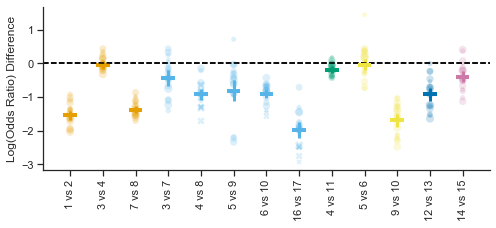

In [50]:
%%time
sns.set(font_scale=1, style="ticks")
fig, ax = plt.subplots(figsize=(8, 3))
sns.scatterplot(data=pt_contrasts_df2, x="Contrast", y="LogOR_difference", hue="Effect", ax = ax,
               alpha = 0.2, style="Replicates", markers={"Yes": "o", "No": "X"},
               style_order=["Yes", "No"], size="Sample Size", linewidth=0,
               palette=effect_type)
g = sns.pointplot(data=lor_df, x=np.arange(13), y="LogOR_difference", join=False, markers="_",
              scale=2, ax = ax, palette=effect_type, hue="Effect", label=None,  zorder=2000)
ax.axhline(ls='--', c="black", y=0)
plt.errorbar(
    lor_df["Contrasts"],
    lor_df["LogOR_difference"],
    yerr=[lor_df["LogOR_difference"] - lor_df["lb_difference"], lor_df["ub_difference"] - lor_df["LogOR_difference"]],
    linestyle='',
    linewidth=3, color=['#E69F00', '#E69F00','#E69F00', '#56B4E9', '#56B4E9', '#56B4E9', '#56B4E9',
                       '#56B4E9', "#009E73", "#F0E442", "#F0E442", "#0072B2", "#CC79A7"])
ax.axhline(ls='--', c="black", y=0, zorder=-2000)
#lgd = plt.legend(handles=ax.get_legend_handles_labels()[0][:-6], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set(xticks=np.arange(13), ylabel="Log(Odds Ratio) Difference", xlabel='',
       xticklabels=[str(a) + " vs " + str(b) for a, b in zip(pt_contrasts_df2["Item 1"], pt_contrasts_df2["Item 2"])])
plt.xticks(rotation=90)
ax.get_legend().remove()
sns.despine()
plt.savefig("../figures/Figure 3b.svg",
           bbox_inches="tight")

# Replication rate by country for the contrast effects

### Preparing the dataframe

In [51]:
continents = {"Europe":['Bulgaria', 'Denmark', 'Belgium', 'Ireland', 'UK','Austria', 'Germany',
       'Hungary', 'Italy', 'Norway', 'Serbia', 'Slovenia', 'Spain', 'Sweden'],
             "Asia":['Hong Kong', 'Mainland China'],
             "North America": ["USA"],
            "Oceania": ["Australia"],
             "South America":["Chile"]}

In [52]:
replication_rate_by_country_contrasts = pd.DataFrame(pt_contrasts_df2.groupby("Country")["Significance2"].mean().sort_values(ascending=False)).reset_index()
for continent in continents.keys():
    replication_rate_by_country_contrasts.loc[replication_rate_by_country_contrasts["Country"].isin(continents[continent]), "Continent"] = continent

cont_col_dict = dict(zip(replication_rate_by_country["Continent"].unique()[1:], sns.color_palette("hls", 7)[:5]))
replication_rate_by_country_contrasts["Colour"] = replication_rate_by_country_contrasts["Continent"].map(cont_col_dict)

### Adding the global results

In [53]:
poled_data_row = pd.Series(["Pooled", 12/13, "Pooled", sns.color_palette("hls", 7)[6]], index=replication_rate_by_country_contrasts.columns)
poled_data_row.name = 3

In [54]:
# Function to insert row in the dataframe 
def Insert_row_(row_number, df, row_value): 
    # Slice the upper half of the dataframe 
    df1 = df.loc[0:row_number] 
   
    # Store the result of lower half of the dataframe 
    df2 = df.loc[row_number:] 
   
    # Inser the row in the upper half dataframe 
    df1.loc[row_number, :]=row_value 
   
    # Concat the two dataframes 
    df_result = pd.concat([df1, df2]) 
   
    # Reassign the index labels 
    df_result.index = [*range(df_result.shape[0])] 
   
    # Return the updated dataframe 
    return df_result 

In [55]:
replication_rate_by_country_contrasts = Insert_row_(3, replication_rate_by_country_contrasts, poled_data_row.values)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


### Plotting the figure

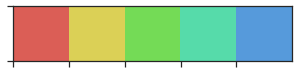

In [56]:
sns.palplot(sns.color_palette("hls", 7)[:5])

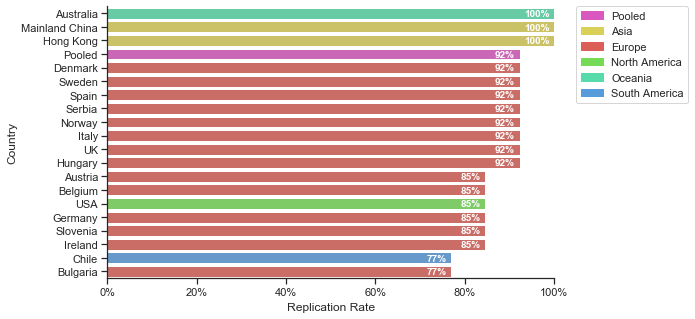

In [57]:
sns.set(font_scale=1, style="ticks")
fig, ax= plt.subplots(figsize=(8, 5))
sns.barplot(y="Country", x="Significance2", data=replication_rate_by_country_contrasts, ax=ax, palette=replication_rate_by_country_contrasts["Colour"])
ax.set(xlim=(0, 1), xlabel="Replication Rate",
      xticklabels=[str(x) + "%" for x in np.arange(0, 120, 20)])
sns.despine()

pooled = mpatches.Patch(color=sns.color_palette("hls", 7)[6], label='Pooled')
asia = mpatches.Patch(color=cont_col_dict["Asia"], label='Asia')
europe = mpatches.Patch(color=cont_col_dict["Europe"], label='Europe')
north_america = mpatches.Patch(color=cont_col_dict["North America"], label='North America')
oceania = mpatches.Patch(color=cont_col_dict["Oceania"], label='Oceania')
south_america = mpatches.Patch(color=cont_col_dict["South America"], label='South America')

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()-.01, i.get_y()+.1, \
            str(int(np.round(i.get_width()*100)))+'%', fontsize=10,
    color='white', verticalalignment='top', horizontalalignment="right",
           weight="heavy")
lgd = plt.legend(handles=[pooled, asia, europe, north_america, oceania, south_america], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig("../figures/Figure 4.svg", bbox_inches="tight", bbox_extra_artists=(lgd,))

# Prospect Theory Changes of mind

### Loading the data

In [58]:
contrast_table = pd.read_excel("../output/contrast_changes_of_mind.xlsx")

In [59]:
contrast_table

,Effect,EUT + PT,Neither,PT
0,Contrast_14_15,43.699871,7.089263,49.210867
1,Contrast_12_13,47.657394,8.272328,44.070278
2,Contrast_9_10,47.730600,7.808687,44.460713
3,Contrast_5_6,39.580283,2.879453,57.540264
4,Contrast_4_11,53.757931,5.563690,40.678380
5,Contrast_16_17,39.507077,22.938019,37.554905
6,Contrast_6_10,47.120547,15.080527,37.798926
7,Contrast_5_9,26.671547,2.367008,70.961445
8,Contrast_4_8,46.364080,26.403123,27.232796
9,Contrast_3_7,24.792582,4.343582,70.863836


### Drawing the figure

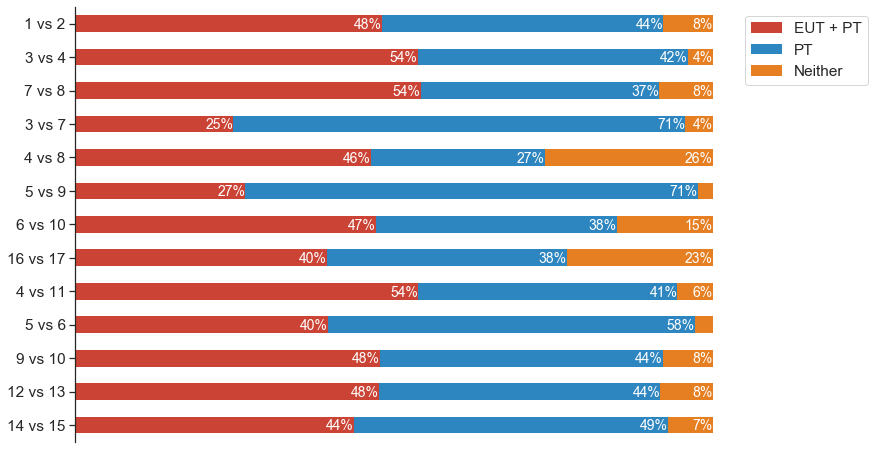

In [60]:
sns.set(font_scale=1.4, style="ticks")
fig, ax = plt.subplots(figsize=(12, 8))
contrast_table.loc[:, ["EUT + PT", "PT", "Neither"]].plot(
    kind="barh", stacked=True, ax=ax, linewidth=0, color=['#cb4335', '#2e86c1', "#e67e22"])
lgd = plt.legend(bbox_to_anchor=(1.0, 0.98), loc=2, borderaxespad=0.)
for p in ax.patches:
    if p.get_width() >= 3:
        ax.annotate("{0:.0f}".format(p.get_width()) + "%",
                (p.get_x() + p.get_width(), p.get_y() + p.get_height()/2), xytext=(0, -5),
                    textcoords='offset points', weight='normal', size=14, ha='right',color = 'white')
ax.set(ylabel='', xticks=[],
      yticklabels=[str(a) + " vs " + str(b) for a, b in zip(pt_contrasts_df2["Item 1"], pt_contrasts_df2["Item 2"])][::-1])
sns.despine(top=True, bottom=True, right=True)
plt.savefig("../figures/Figure 5.svg", bbox_extra_artists=(lgd,),
           bbox_inches="tight")